In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline     
sns.set(color_codes=True)

In [329]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [330]:
df= pd.read_csv(url, header=None)

In [331]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [332]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [333]:
headers= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [334]:
df.columns = headers

In [335]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [340]:
path = "C:\\Users\\praty\\OneDrive\\Desktop\\harvard\\coursee.csv"
df.to_csv(path)

In [341]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [342]:
 df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [343]:
 df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [345]:
df.shape

(205, 26)

In [346]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [347]:
df.shape

(205, 26)

In [348]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [349]:
df.replace(['NA', 'None', '', '?'], np.nan, inplace=True)

In [350]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [351]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [352]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [353]:
df.dropna(subset=["price"],axis=0,inplace= True)

In [354]:
df.shape

(201, 26)

In [355]:
df["normalized-losses"].isnull().sum()

37

In [356]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['normalized-losses'].dtypes

dtype('float64')

In [357]:
df['normalized-losses'].isnull().sum()

37

In [358]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [359]:
mean = df['normalized-losses'].mean()

In [360]:
mean

122.0

In [361]:
df['normalized-losses'].fillna(mean, inplace=True)

In [362]:
df['normalized-losses'].isnull().sum()

0

In [363]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [364]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [365]:
df.loc[:, "length"] = df["length"] / df["length"].max()
df["length"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 201, dtype: float64

In [366]:
df.loc[:, "width"] = df["width"] / df["width"].max()
df.loc[:, "height"] = df["height"] / df["height"].max()

In [367]:
df[["length", "height","width"]]

,length,height,width
0,0.811148,0.816054,0.890278
1,0.811148,0.816054,0.890278
2,0.822681,0.876254,0.909722
3,0.848630,0.908027,0.919444
4,0.848630,0.908027,0.922222
...,...,...,...
200,0.907256,0.928094,0.956944
201,0.907256,0.928094,0.955556
202,0.907256,0.928094,0.956944
203,0.907256,0.928094,0.956944


In [368]:
df["price"] = df["price"].astype(int)

In [369]:
bins = np.linspace(min(df['price']), max(df["price"]),4)
group_names = ["Low","Medium","High"]
df["price-binned"] = pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

In [370]:
df[["price" , "price-binned"]] 

,price,price-binned
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
...,...,...
200,16845,Low
201,19045,Medium
202,21485,Medium
203,22470,Medium


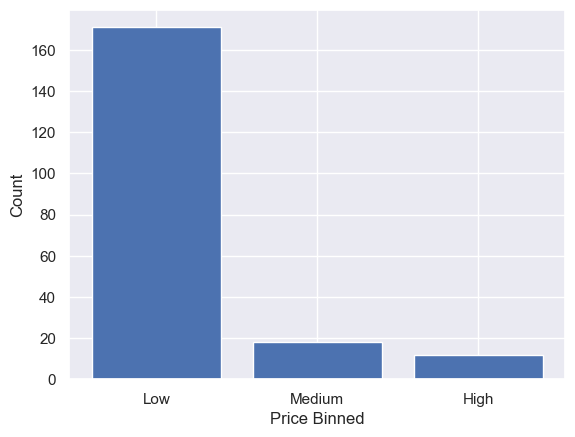

In [371]:
count_data = df.groupby("price-binned")["price"].count()
plt.bar(count_data.index, count_data.values)
plt.xlabel("Price Binned")
plt.ylabel("Count")
plt.show()

In [372]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [373]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

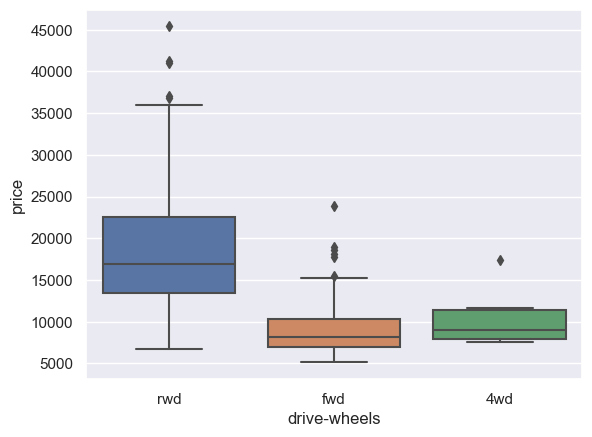

In [374]:
sns.boxplot(x="drive-wheels", y="price", data=df);

In [375]:
df["engine-size"].dtype

dtype('int64')

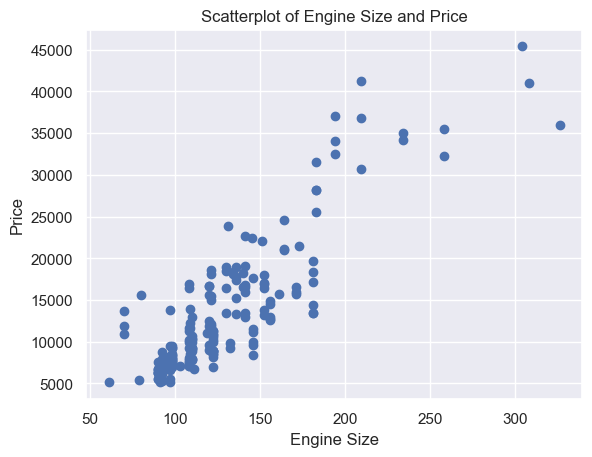

In [376]:
x= df["engine-size"]
y= df["price"]
plt.scatter(x,y);
plt.xlabel("Engine Size");
plt.ylabel("Price");
plt.title("Scatterplot of Engine Size and Price");

#### GroupBy for categorical variables ####

In [377]:
df_test = df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()

In [378]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [379]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns= 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

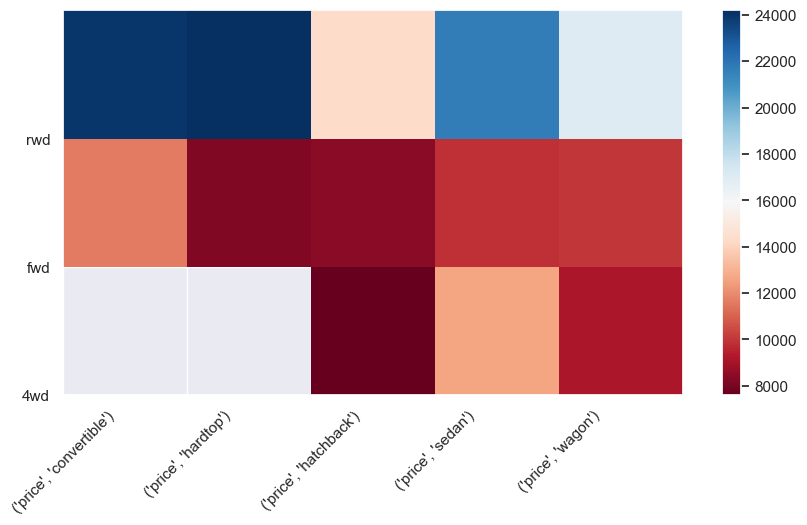

In [380]:
 plt.figure(figsize=(10,5))
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.xticks(ticks=range(len(df_pivot.columns)), labels=df_pivot.columns, rotation=45) 
plt.yticks(ticks=range(len(df_pivot.index)), labels=df_pivot.index)
plt.show()

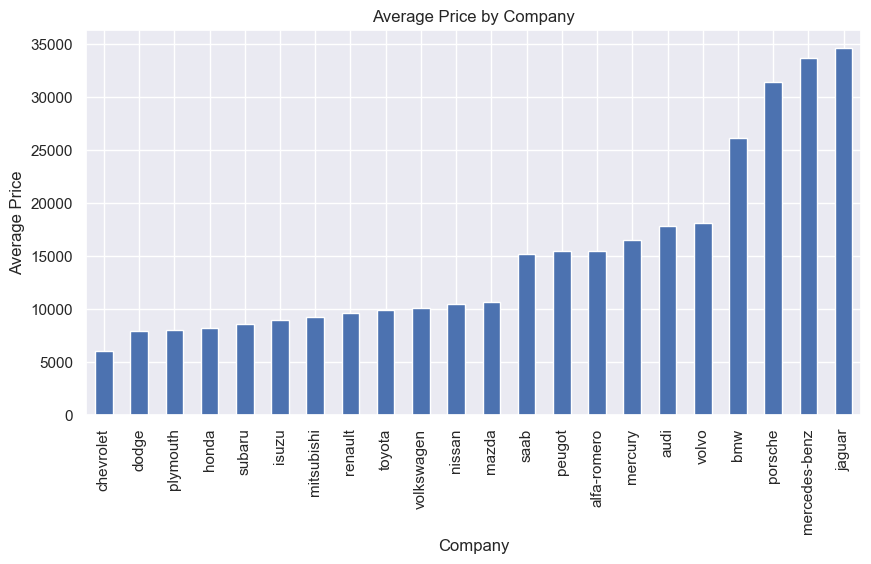

In [381]:
df_avg_price = df.groupby('make')['price'].mean().sort_values(ascending=True)
df_avg_price.plot(kind='bar', figsize=(10, 5))
plt.title('Average Price by Company')
plt.ylabel('Average Price')
plt.xlabel('Company')
plt.show()

In [382]:
df_anova = df[["make","price"]]
grouped_anova = df_anova.groupby(['make'])

In [383]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])

In [384]:
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [385]:
anova_results_2 = stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"])

In [386]:
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077865e-11)

The F-statistic of 0.19744030127462606 suggests that there is a small difference between the means of the "price" variable for the "honda" and "subaru" groups.
The p-value of 0.6609478240622193 is greater than the typical significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis, and we do not have sufficient evidence to conclude that there is a significant difference in the means of the "price" variable between the "honda" and "subaru" groups.

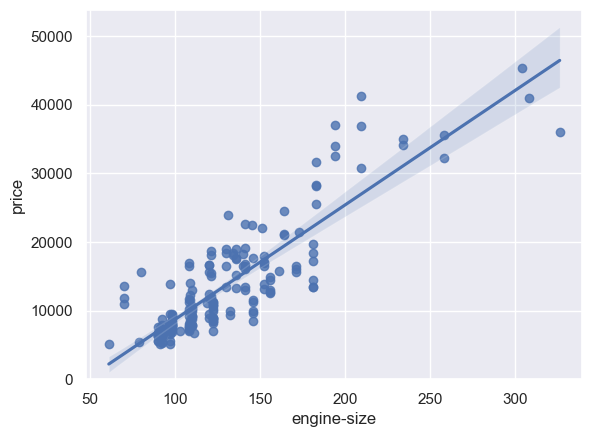

In [387]:
sns.regplot(x= "engine-size",y="price", data=df);
plt.ylim(0,);

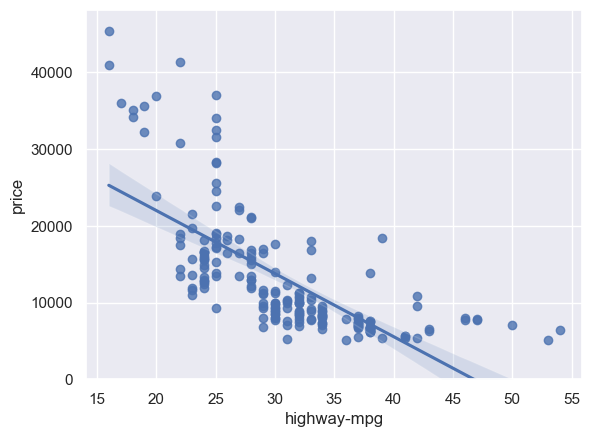

In [388]:
sns.regplot(x="highway-mpg",y="price", data=df);
plt.ylim(0,);

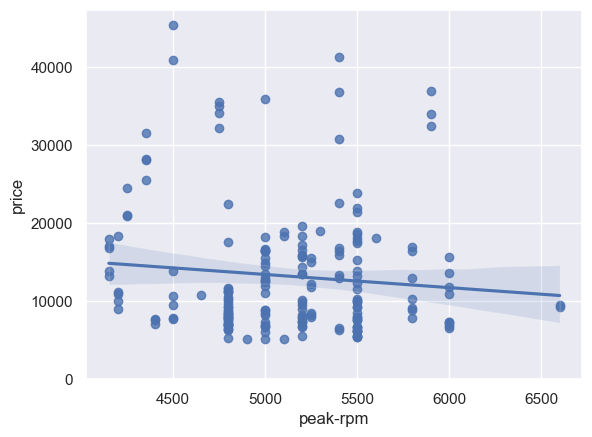

In [389]:
df["peak-rpm"] = df["peak-rpm"].astype(float)
sns.regplot(x="peak-rpm",y="price", data=df);
plt.ylim(0,);

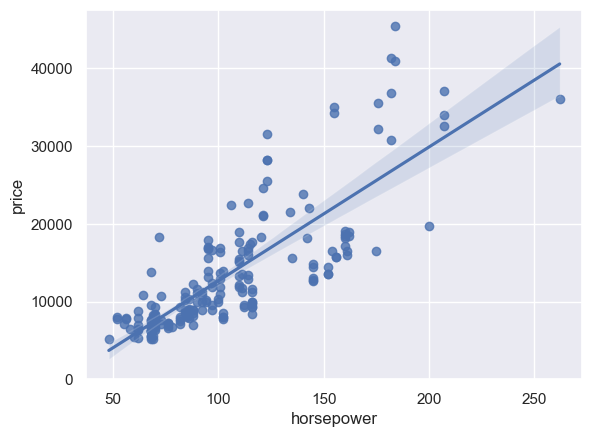

In [390]:
df["horsepower"] = df["horsepower"].astype(float) 
sns.regplot(x="horsepower",y="price", data=df);
plt.ylim(0,);

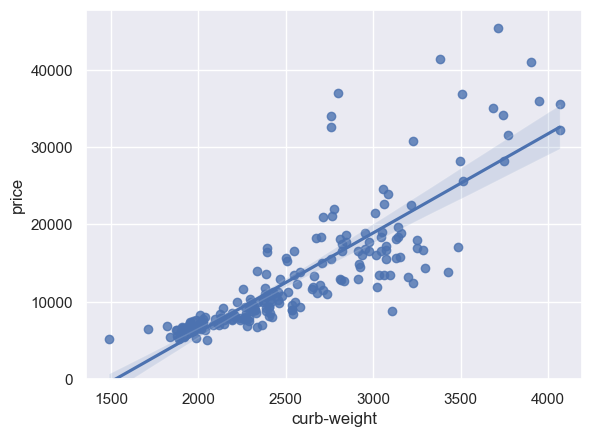

In [469]:
sns.regplot(x="curb-weight",y="price", data=df);
plt.ylim(0,);

In [391]:
df["horsepower"].isnull().sum()

2

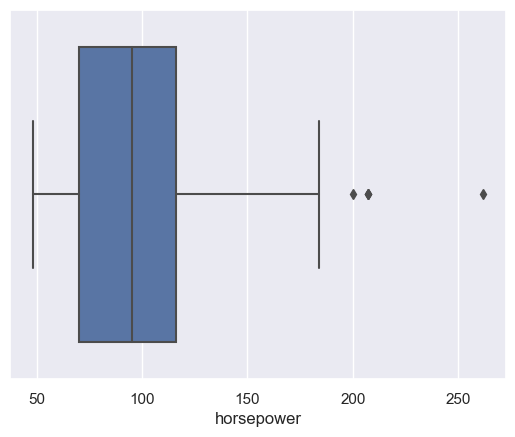

In [392]:
sns.boxplot(x=df["horsepower"]);

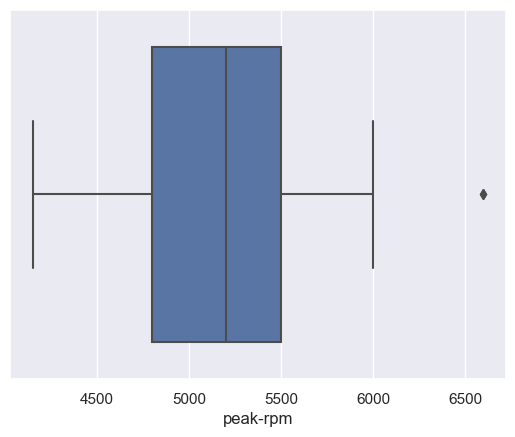

In [393]:
sns.boxplot(x=df["peak-rpm"]);

In [394]:
columns=['peak-rpm','horsepower']

In [395]:
Q1= df[columns].quantile(0.25)
Q3= df[columns].quantile(0.75)
IQR= Q3-Q1
print(IQR)

peak-rpm      700.0
horsepower     46.0
dtype: float64


In [396]:
outliers = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
df[outliers] = np.nan

In [397]:
df["horsepower"].isnull().sum()

7

In [398]:
df["peak-rpm"].isnull().sum()

4

In [399]:
df["peak-rpm"].value_counts()

peak-rpm
5500.0    36
4800.0    36
5000.0    27
5200.0    23
5400.0    11
6000.0     9
5800.0     7
5250.0     7
4500.0     7
4150.0     5
4200.0     5
4350.0     4
4750.0     4
5100.0     3
5900.0     3
4250.0     3
4400.0     3
4650.0     1
5600.0     1
4900.0     1
5300.0     1
Name: count, dtype: int64

In [400]:
mean1= df["horsepower"].mean()
mean2= df["peak-rpm"].mean()

In [401]:
df["horsepower"].fillna(mean1,inplace=True)
df["peak-rpm"].fillna(mean2,inplace=True)

In [402]:
df["horsepower"].isnull().sum()

0

In [403]:
mean1

100.47938144329896

In [404]:
mean2

5102.53807106599

In [405]:
pearson_coef, p_value= stats.pearsonr(df["horsepower"],df["price"])

In [406]:
print(pearson_coef, p_value)

0.7162278001642314 6.391376679193927e-33


In [407]:
pearson_coef, p_value= stats.pearsonr(df["peak-rpm"],df["price"])

In [408]:
print(pearson_coef, p_value)

-0.09099674772910889 0.19888925720544176


In [409]:
pearson_coef, p_value= stats.pearsonr(df["highway-mpg"],df["price"])
print(pearson_coef, p_value)

-0.704692265058953 1.7495471144475452e-31


In [410]:
pearson_coef, p_value= stats.pearsonr(df["engine-size"],df["price"])
print(pearson_coef, p_value)

0.8723351674455182 9.265491622200262e-64


In [411]:
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                   int32
price-binned         category
dtype: object

In [412]:
df["stroke"]= df["stroke"].astype(float)

In [413]:
df["bore"]= df["bore"].astype(float)

In [414]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
price-binned         0
dtype: int64

In [417]:
numeric_columns= ["symboling","normalized-losses", "length","width","height","curb-weight",'wheel-base', "engine-size","bore","stroke","compression-ratio","horsepower",
                  "peak-rpm","city-mpg","highway-mpg","price"]

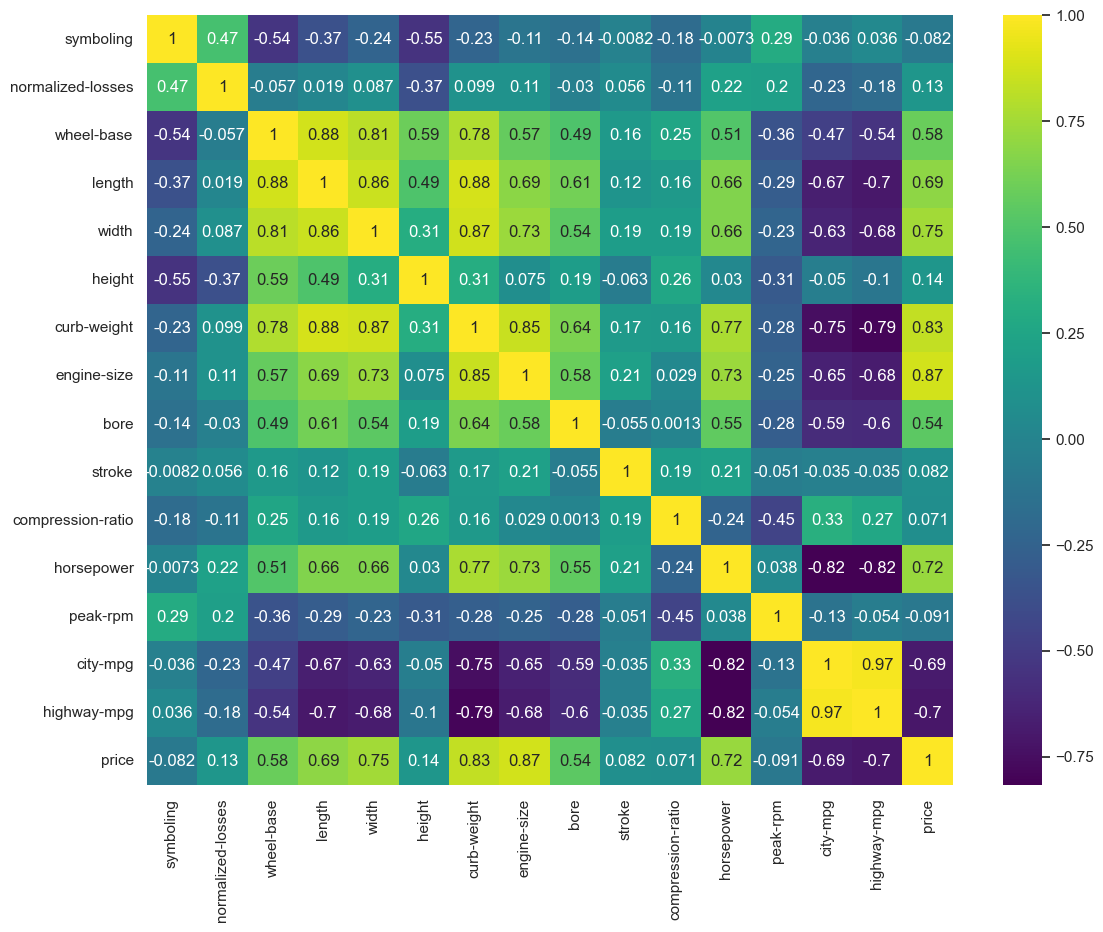

In [435]:
plt.figure(figsize=(13, 10));
numeric_columns = df.select_dtypes(include=np.number)
c = numeric_columns.corr()
sns.heatmap(c, cmap="viridis", annot=True);

In [437]:
from sklearn.linear_model import LinearRegression

In [438]:
lm= LinearRegression()

In [571]:
X= df[['horsepower']]
Y= df['price']

In [572]:
lm.fit(X,Y)

LinearRegression()

In [573]:
Yhat= lm.predict(X)

#### Y = b_0 + b_1*X ####

In [546]:
b_0 = lm.intercept_  

In [547]:
b_0

-7963.338906281024

In [548]:
b_1

array([175.28160846])

In [549]:
b_1 = lm.coef_ #b_1

In [531]:
Y = b_0 + b_1*160
Y

array([23639.99911032])

In [540]:
Z = df[["horsepower", "curb-weight","engine-size","highway-mpg"]]

In [541]:
lm.fit(Z, df["price"])

LinearRegression()

In [460]:
Yhat1 = lm.predict(Z)

In [480]:
Yhat1

array([13979.68071353, 13979.68071353, 17924.08909366, 10476.66198823,
       16237.54469877, 14675.37290541, 15971.99285672, 16395.22192095,
       17104.50438397, 10681.3684642 , 10681.3684642 , 18334.99811753,
       18546.61264964, 19962.94938529, 26409.60969181, 26986.74023394,
       27668.04969962,  -838.91159495,  5029.73809653,  5164.40188969,
        5221.01989362,  5521.57091449,  8459.84245177,  5871.69677671,
        5956.34258956,  5956.34258956,  8702.23727947, 12554.18230709,
       18443.74930364,  3428.06855099,  5589.87186185,  3690.97546841,
        6456.15852699,  6517.71911815,  6725.48611331,  6779.35163058,
        9763.50877185,  9967.42823007, 10025.14128428, 10286.77379671,
       11271.36778132, 10300.65009345, 10595.96623042, 13106.07437157,
       35278.31712929, 35278.31712929, 41895.32258035,  6386.9661757 ,
        5724.15582981,  5743.39351455,  5897.29499245,  5916.53267719,
        7035.48436552,  7035.48436552,  7054.72205025,  8884.89969392,
      

In [462]:
B_0 = lm.intercept_

In [463]:
lm.coef_

array([   8.39031203,    3.84753695,  110.24402858, -100.18367362])

In [464]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


In [468]:
P = B_0 + 8.39031203 + 111*8.39031203 + 3.84753695*2548 + 110.24402858*130+ (-100.18367362)*27
P

13988.071031915179

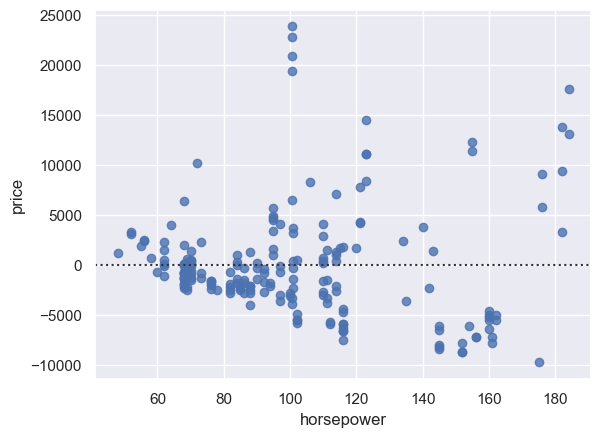

In [470]:
sns.residplot(x=df['horsepower'], y=df['price']);

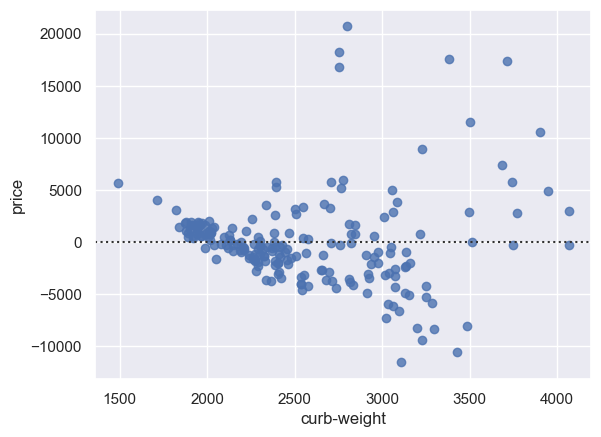

In [471]:
sns.residplot(x=df['curb-weight'], y=df['price']);

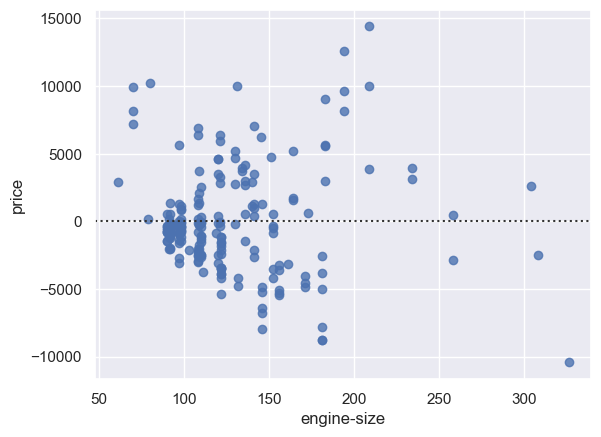

In [472]:
sns.residplot(x=df['engine-size'], y=df['price']);

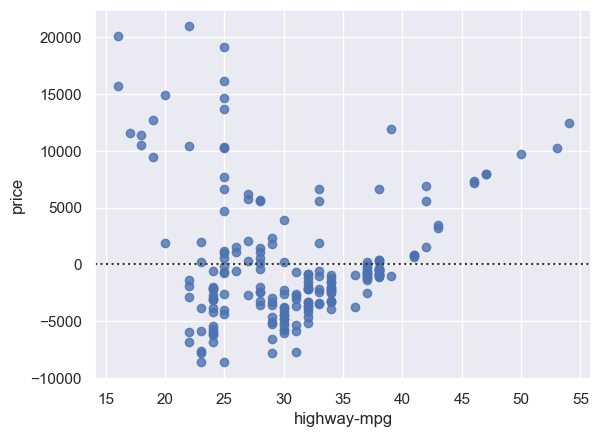

In [473]:
sns.residplot(x=df['highway-mpg'], y=df['price']);

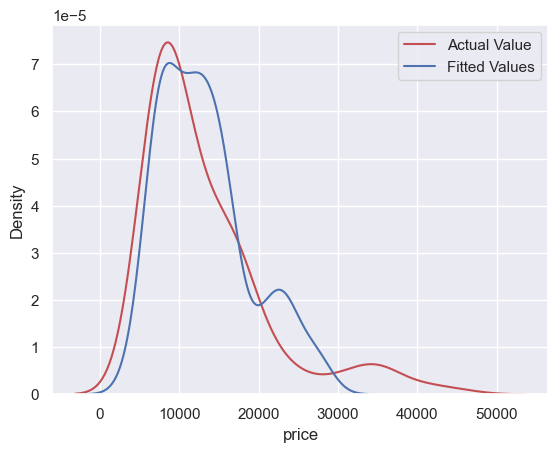

In [574]:
ax2 = sns.kdeplot(df['price'], color='r', label='Actual Value');
sns.kdeplot(Yhat, color='b', label='Fitted Values', ax=ax2);
plt.legend();

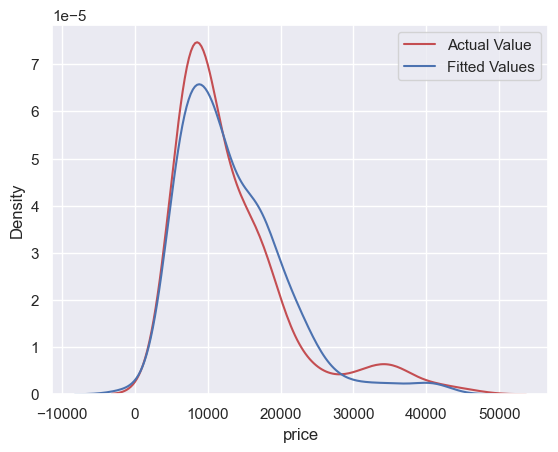

In [477]:
ax2 = sns.kdeplot(df['price'], color='r', label='Actual Value');
sns.kdeplot(Yhat1, color='b', label='Fitted Values', ax=ax2);
plt.legend();

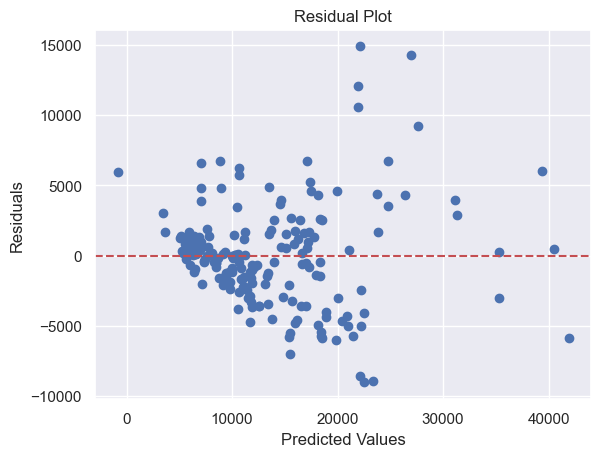

In [481]:
residuals = df['price'] - Yhat1
plt.scatter(Yhat1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

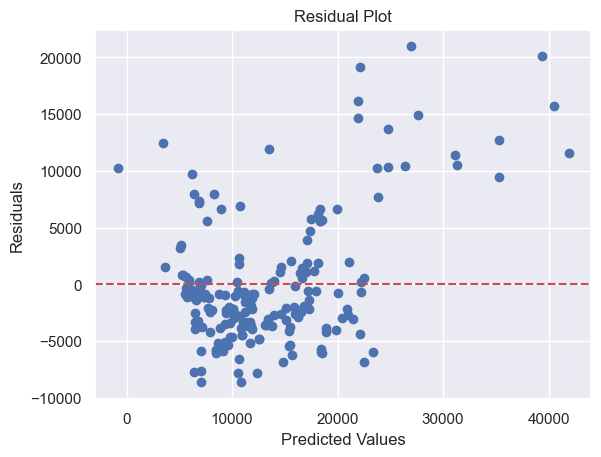

In [482]:
residuals = df['price'] - Yhat
plt.scatter(Yhat1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [575]:
x = df["horsepower"]
f = np.polyfit(x,Y,3)
p = np.poly1d(f)
Yhat3 = np.polyval(p,x)

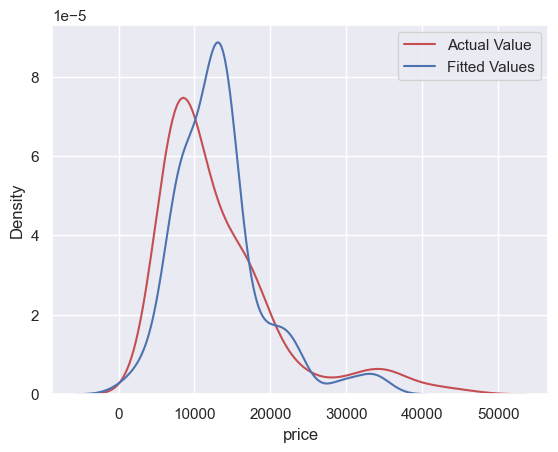

In [576]:
ax2 = sns.kdeplot(df['price'], color='r', label='Actual Value');
sns.kdeplot(Yhat3, color='b', label='Fitted Values', ax=ax2);
plt.legend();

#### Making a pipeline ####

In [479]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [565]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [566]:
Yhat2 = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

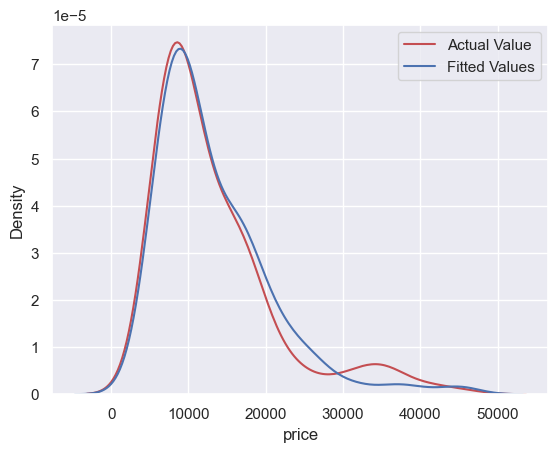

In [567]:
ax2 = sns.kdeplot(df['price'], color='r', label='Actual Value');
sns.kdeplot(Yhat2, color='b', label='Fitted Values', ax=ax2);
plt.legend();

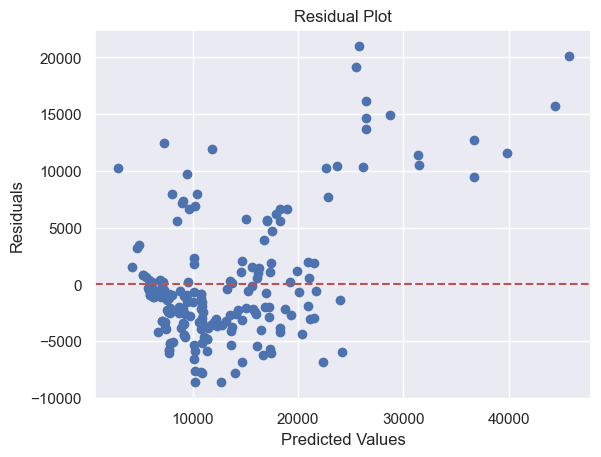

In [494]:
residuals = df['price'] - Yhat
plt.scatter(Yhat2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [511]:
from sklearn.metrics import mean_squared_error

In [578]:
mean_squared_error(df['price'],Yhat) #linear

30605000.768864505

In [577]:
mean_squared_error(df['price'],Yhat3) #linearpoly

28495594.694283083

In [513]:
mean_squared_error(df['price'],Yhat1) #M.linear

12766585.916655298

In [514]:
mean_squared_error(df['price'],Yhat2) #M.linearpipeline

10078843.775696198

##### R^2 concept wonderfully explained at [R^2](https://www.youtube.com/watch?v=bXrB0VRiT10) #####

In [579]:
X = df[['horsepower']]
Y= df['price']
lm.score(X,Y)

0.5129822617280946

In [542]:
Z = df[["horsepower", "curb-weight","engine-size","highway-mpg"]]
lm.score(Z,df['price'])

0.7968451677051173